## Dynamic Progamming

이 문제의 핵심은 규칙성을 발견하는 것. (초기에 규칙성을 찾지 못했다.)

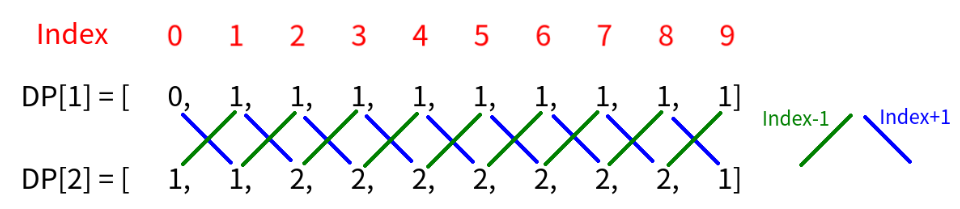

상위 그림을 설명하면 다음과 같다. 

DP[N][I] 라는 이중 배열을 선언한다. 배열을 설명하자면
N은 자리수를 의미하는 수로 N =1,2,3 .. 으로 나아간다.
I는 이후 끝 자리가 어떤 수인가를 의미하는 수이다. 즉, 0 ~ 9 까지의 수가 올 수 있다.

1 2 3 4 5 6 7 8 9 -> N = 1
10 21 12 32 .. -> N = 2
이런식으로 볼 수 있다. 

이때 규칙성을 볼 수 있다. (위의 그림과 같다.)

왜 이런 규칙성이 나오게 되는가 ? 를 살펴보면

맨 뒤에 나오는 숫자를 고정하고 나머지 자리에 대해 올 수 있는 수를 생각하면 쉽다. 

이를 테면, 2 라는 숫자가 뒤에 온다고 가정하고 N = 2 라고 가정하자.
그렇게 되면, [X]2 로 앞자리만 결정을 하면 되게 된다. 이때 계단 수가 되기 위해서는 2와 +- 1인 숫자가 오면 되는데, 
이러한 수들의 조합을 N = 1 의 1 과 3에서 찾을 수 있다. 식으로 작성하면

DP[N][I] = DP[N-1][I-1] + DP[N-1][I+1] 으로 작성이 가능하다.

단, 0과 1은 예외 처리를 해줘야 한다.

In [16]:
value = int(input())

dp_ary = []
temp_ary = []
for i in range (0,10) :
    if i == 0 :
        temp_ary.append(0)
    else:
        temp_ary.append(1)
dp_ary.append(temp_ary)
del temp_ary
# 0,1,2,3,4,5,6,7,8,9 -> 자리수가 1이며 각 끝 자리가 그런 경우를 의미
for i in range (1,value) :
    temp_ary = []
    for j in range (0,10) :
        if j == 0 : ## 끝 자리 수가 0인 경우에 대한 예외처리
            temp_ary.append(dp_ary[i-1][1]%1000000000)
        elif j == 9: ## 끝 자리 수가 9인 경우에 대한 예외처리
            temp_ary.append(dp_ary[i-1][8]%1000000000)
        else :
            temp_ary.append((dp_ary[i-1][j-1] + dp_ary[i-1][j+1])%1000000000)
    dp_ary.append(temp_ary)
result = 0
for i in range(0,10) :
    result = result + dp_ary[value-1][i]
print(result % 1000000000)

3
32
